In [43]:
#Importing the packages
from tkinter import *                     #Tkinter library
import random                             #Used in Random Page Replacement Algorithm
import matplotlib.pyplot as plt           #To compare all algorithms
from matplotlib.figure import Figure 
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,  
NavigationToolbar2Tk) 

In [44]:
'''Initializing the variables
Here N = number of frames'''
def Initialize(N):
    global Frame                          
    global index             
    global L_End
    global L_Total_Faults       #LIFO algorithm Total Faults
    global F_Total_Faults       #FIFO algorithm Total Faults    
    global R_Total_Faults       #Random page replacement algorithm Total Faults
    global LRU_Total_Faults     #LRU algorithm Total Faults
    global OPT_Total_Faults     #Optimal page replacement algorithm Total Faults
    global front
    global Fault
    global column
    global count
    global temp_array 
    global temp_index 
    front=0
    temp_array=[]
    temp_index= 0
    R_Total_Faults=0
    OPT_Total_Faults=0
    LRU_Total_Faults=0
    count=0
    column=0
    Frame=[None]*N
    L_End=N-1
    index=0
    F_Total_Faults=0
    L_Total_Faults=0
    Fault=False
    

In [45]:
#We use this function to build the labels containing the Reference string.
#Here, frame = Current frame 
def build_Label(frame,RefString):
    global column
    row_index= len(frame)
    row_index=row_index+1
    for i in frame:
        if i!= None:
            if i == RefString[count-1]:
                MyLabel= Label(root,text=i,padx=20,pady=10,bd=3,fg="white",bg="navy blue",relief=RAISED,anchor="center")
                MyLabel.grid(row=row_index,column=column)
            else:
                MyLabel= Label(root,text=i,padx=20,pady=10,bd=3,fg="white",bg="navy blue",relief=RAISED,anchor="center")
                MyLabel.grid(row=row_index,column=column)
            row_index-=1

In [46]:
#For spaces in between Frames
#Here, spaces have been used only for the purpose of clarity and a better vision of the GUI.
'''NOTE : using this might reduce the number of frames visible on the screen. If the 
reference string is large, you can remove this function'''
def build_EmptyLabel():
    global column
    MyLabel1= Label(root,text=" ",padx=20,pady=10,bg="black")
    MyLabel1.grid(row=1,column=column+1)
    column+=1
    

In [47]:
#This function displays whether we have a hit or a fault for every frame present in the GUI.
#Here, fault= Total number of faults
def Faults(fault,N):
    global column
    if(fault==False):
         flagLabel= Label(root,text="HIT",bg='black',fg='green',font=('RALEWAY 10 bold')).grid(row=N+3,column=column)
    else:
        flagLabel= Label(root,text="FAULT",bg='black',fg='red',font=('HELVETICA 10 bold')).grid(row=N+3,column=column)
        

In [48]:
#Prints the reference string as a part of GUI
def Print_RefString(number):
    global column
    RefString_Label = Label(root,text=number,font=('RALEWAY 10 bold')).grid(row=1,column=column,padx=20,pady=10)

In [49]:
#Label for the fault and hit ratio
# Here, we have used a seperate frame called frame1 which is present in the root.
def builtFaults(frame1,FaultRatio):
    HitRatio= 1-FaultRatio
    myLabel4=Label(frame1,text=" Hit Ratio:  ",fg="dark grey",bg="navy blue",bd=3,padx=10,pady=15,relief=RAISED,font="bold 10")
    myLabel4.grid(row=1,column=0)
    myLabel5=Label(frame1,text="Miss Ratio:",fg="yellow",bg="navy blue",bd=3,padx=10,pady=15,relief=RAISED,font="bold 10")
    myLabel5.grid(row=2,column=0)
    e2=Label(frame1,text=str(HitRatio),borderwidth=3)
    e2.grid(row=1,column=1)
    e3=Label(frame1,text= str(FaultRatio),borderwidth=3)
    e3.grid(row=2,column=1)
    

In [50]:
#FIFO Algorithm implementation
def FIFO(N,RefString,root):
    global Frame
    global index
    global front
    global F_Total_Faults
    global Fault
    global column
    global count        
    i=0
    FaultRatio=0
    if count!=len(RefString):
        i=RefString[count]
        column+=1
        #IN CASE OF A HIT
        if None in Frame:
            if i not in Frame:
                Frame[index]=i
                index+=1
                Fault=True
                F_Total_Faults+=1
            else:
                Fault=False
        elif i in Frame: 
            Fault=False
        #IN CASE OF A FAULT
        else:
            Fault=True
            F_Total_Faults+=1
            Frame[front]=i
            front+=1
            if(front>N-1):
                front=0
        count+=1
        if root!=None:
            build_Label(Frame,RefString)
            Print_RefString(i)
            Faults(Fault,N)
            build_EmptyLabel()
            root.after(1000,lambda: FIFO(N,RefString,root))
        else:
            FIFO(N,RefString,root)
    else:
        #Fault and hit ratio
        FaultRatio = float(F_Total_Faults/(len(RefString)))
        lenCol= int(len(RefString)/2)
        if root!=None:
            frame1=LabelFrame(root,text=" FIFO Page Fault Ratio",fg="white",bg="black",padx=50,pady=60)
            frame1.grid(row=N+4,column= lenCol,columnspan=int(len(RefString)))
            builtFaults(frame1,FaultRatio)

In [51]:
#LIFO algorithm implementation
def LIFO(N,RefString,root):
    global Frame
    global index
    global L_End
    global L_Total_Faults
    global Fault
    global column
    global count
    i=0
    FaultRatio=0
    if count!=len(RefString):
        i=RefString[count]
        column+=1
        #IN CASE OF A HIT
        if None in Frame:
            if i not in Frame:
                Frame[index]=i
                index+=1
                Fault=True
                L_Total_Faults+=1
            else:
                Fault=False
        elif i in Frame: 
            Fault=False
        #IN CASE OF A FAULT
        else:
            Fault=True
            L_Total_Faults+=1
            Frame[L_End]=i
        count+=1
        if root!=None:
            build_Label(Frame,RefString)
            Print_RefString(i)
            Faults(Fault,N)
            build_EmptyLabel()
            
            root.after(1000,lambda: LIFO(N,RefString,root))
        else:
            LIFO(N,RefString,root)
    else:
        #Hit and Fault Ratio
        FaultRatio = float(L_Total_Faults/(len(RefString)))
        lenCol= int(len(RefString)/2)
        if root!=None:
            frame1=LabelFrame(root,text=" LIFO Page Fault Ratio",fg="white",bg="black",padx=50,pady=60)
            frame1.grid(row=N+4,column= lenCol,columnspan=int(len(RefString)))
            builtFaults(frame1,FaultRatio)

In [52]:
#LRU Algorithm Implementation
def LRU(N,RefString,root):
    global Frame
    global index
    global LRU_Total_Faults
    global Fault
    global column
    global count
    global temp_array  #a[]
    global temp_index #0
    i=0
    FaultRatio=0
    temp=0
    if count!=len(RefString):
        i=RefString[count]
        column+=1
        #IN CASE OF A HIT
        if None in Frame:
            if i not in Frame:
                Frame[index]=i
                index+=1
                Fault=True
                temp_array.append(i)
                LRU_Total_Faults+=1
            else:
                Fault=False
                temp_array.remove(i)
                temp_array.append(i)       
        elif i in Frame: 
            Fault=False
            temp_array.remove(i)
            temp_array.append(i)
        #IN CASE OF A FAULT
        else:
            Fault=True
            LRU_Total_Faults+=1
            temp = temp_array[temp_index]
            Frame_index = Frame.index(temp)
            Frame[Frame_index]=i
            temp_index+=1
            temp_array.append(i)
            
        count+=1
        if root!=None:
            build_Label(Frame,RefString)
            Print_RefString(i)
            Faults(Fault,N)
            build_EmptyLabel()
            root.after(1000,lambda: LRU(N,RefString,root))

        else:
            LRU(N,RefString,root)
    else:
        #Hit and fault ratio
        FaultRatio = float(LRU_Total_Faults/(len(RefString)))
        lenCol= int(len(RefString)/2)
        if root!=None:
            frame1=LabelFrame(root,text=" LIFO Page Fault Ratio",fg="white",bg="black",padx=50,pady=60)
            frame1.grid(row=N+4,column= lenCol,columnspan=int(len(RefString)))
            builtFaults(frame1,FaultRatio)

In [53]:
#we use this function to get the frames for optimal page replacement algorithm
def getFrame(b,value):
    a=Frame
    b=b[count+1:]
    max_index=0
    max=0
    for i in a:
        if b.count(i)==0:
            b.append(i)
        if max < (b.index(i)):
            max=b.index(i)
            max_index=i
    temp=a.index(max_index)
    a[temp]=value
    return a

In [54]:
#Optimal Page replacement algorithm implementation
def Optimal_Algo(N,RefString,root):
    global Frame
    global index
    global L_End
    global OPT_Total_Faults
    global Fault
    global column
    global count
    global temp_array  
    global temp_index 
    i=0
    FaultRatio=0
    temp=0
    if count!=len(RefString):
        i=RefString[count]
        column+=1
        #IN CASE OF A HIT
        if None in Frame:
            if i not in Frame:
                Frame[index]=i
                index+=1
                Fault=True
                OPT_Total_Faults+=1
            else:
                Fault=False      
        elif i in Frame: 
            Fault=False
        #IN CASE OF A FAULT
        else:
            Fault=True
            OPT_Total_Faults+=1
            Frame= getFrame(RefString,i) #Get the frame in case of a fault
            
        count+=1
        if root!=None:
            build_Label(Frame,RefString)
            Print_RefString(i)
            Faults(Fault,N)
            build_EmptyLabel()
            root.after(1000,lambda: Optimal_Algo(N,RefString,root))
        else:
            Optimal_Algo(N,RefString,root)
    else:
        #Hit and fault ratio
        FaultRatio = float(OPT_Total_Faults/(len(RefString)))
        lenCol= int(len(RefString)/2)
        if root!=None:
            frame1=LabelFrame(root,text=" Optimal Page Fault Ratio",fg="white",bg="black",padx=50,pady=60)
            frame1.grid(row=N+4,column= lenCol,columnspan=int(len(RefString)))
            builtFaults(frame1,FaultRatio)

In [55]:
#Random page replacement algorithm implementation
def Random_Algo(N,RefString,root):
    global Frame
    global index
    global R_Total_Faults
    global Fault
    global column
    global count
    randomIndex= random.randint(0,N-1)
    i=0
    FaultRatio=0
    if count!=len(RefString):
        i=RefString[count]
        column+=1
        #IN CASE OF A HIT
        if None in Frame:
            if i not in Frame:
                Frame[index]=i
                index+=1
                Fault=True
                R_Total_Faults+=1
            else:
                Fault=False
        elif i in Frame: 
            Fault=False
        #IN CASE OF A FAULT
        else:
            Fault=True
            R_Total_Faults+=1
            Frame[randomIndex]=i
        count+=1
        if root!=None:
            build_Label(Frame,RefString)
            Print_RefString(i)
            Faults(Fault,N)
            build_EmptyLabel()
            root.after(1000,lambda: Random_Algo(N,RefString,root))
        else:
            Random_Algo(N,RefString,root)
    else:
        #Hit and fault ratio
        FaultRatio = float(R_Total_Faults/(len(RefString)))
        lenCol= int(len(RefString)/2)
        if root!=None:
            frame1=LabelFrame(root,text=" Random Page Fault Ratio",fg="white",bg="black",padx=50,pady=60)
            frame1.grid(row=N+4,column= lenCol,columnspan=int(len(RefString)))
            builtFaults(frame1,FaultRatio)

In [56]:
#Basic layout design 
def Basic_design(N,RefString):
    k=N

    RefStringLabel= Label(root,text="Reference String").grid(row=1,column=0,padx=20,pady=10)
    for i in range(N):
        mylabel= Label(root,text="Frame "+str(k),pady=10,padx=20,bg='black',fg='white').grid(row=i+2,column=0)
        k-=1
    FaultStringLabel= Label(root,text="Page Faults").grid(row=N+3,column=0,padx=20,pady=10)

In [57]:
#opening a new root and its functionalities when the FIFO button is pressed
def FirstInFirstOut(N1,RefString1):
    global root
    print(RefString1)
    root=Tk()
    root.title('Visualization of Algorithm')
    FIFONameLabel= Label(root,text="First In First Out Algorithm").grid(row=0,column=0,padx=20,pady=10)
    root.geometry("1366x654")
    root.config(bg="black")
    try:
        #N= int(input('Enter the Number of Frames'))
        N=int(N1)
        print(f'{N}')
        RefString= list(map(int,RefString1.split()))
    except ValueError as e:
        print('ERROR! Please enter a valid Number')
        
    value=[]
    fault=0
    hit=0
    #initializing the variables
    Initialize(N)
    #Basic design layout
    Basic_design(N,RefString)
    #Algorithm implementation
    FIFO(N,RefString,root)
    root.mainloop()


In [58]:
#opening a new root and its functionalities when the LIFO button is pressed
def LastInFirstOut(N1,RefString1):
    global root
    print(RefString1)
    root=Tk()
    root.title('Visualization of Algorithm')
    LIFONameLabel= Label(root,text="Last In First Out Algorithm").grid(row=0,column=0,padx=20,pady=10)
    root.geometry("1366x654")
    root.config(bg="black")
    try:
        N=int(N1)
        print(f'{N}')
        RefString= list(map(int,RefString1.split()))
    except ValueError as e:
        print('ERROR! Please enter a valid Number')
        
    value=[]
    fault=0
    hit=0
    #Initializing the variables
    Initialize(N)
    #Basic design layout
    Basic_design(N,RefString)
    #Algorithm implementation
    LIFO(N,RefString,root)
    #FaultRatio()
    root.mainloop()


In [59]:
#opening a new root and its functionalities when the LRU button is pressed
def LeastRecentlyUsed(N1,RefString1):
    global root
    print(RefString1)
    root=Tk()
    root.title('Visualization of Algorithm')
    LIFONameLabel= Label(root,text="Least Recently Used Out Algorithm").grid(row=0,column=0,padx=20,pady=10)
    root.geometry("1366x654")
    root.config(bg="black")
    try:
        N=int(N1)
        print(f'{N}')
        RefString= list(map(int,RefString1.split()))
    except ValueError as e:
        print('ERROR! Please enter a valid Number')
        
    value=[]
    fault=0
    hit=0
    #Initialize the variables
    Initialize(N)
    #Basic layout
    Basic_design(N,RefString)
    #Algorithm Implementation
    LRU(N,RefString,root)
    root.mainloop()

In [60]:
#opening a new root and its functionalities when the Optimal page replacement button is pressed
def Optimal(N1,RefString1):
    global root
    print(RefString1)
    root=Tk()
    root.title('Visualization of Algorithm')
    LIFONameLabel= Label(root,text="Optimal Page Replacement Algorithm").grid(row=0,column=0,padx=20,pady=10)
    root.geometry("1366x654")
    root.config(bg="black")
    try:
        N=int(N1)
        print(f'{N}')
        RefString= list(map(int,RefString1.split()))
    except ValueError as e:
        print('ERROR! Please enter a valid Number')
        
    value=[]
    fault=0
    hit=0
    #initializing the variables
    Initialize(N)
    #Basic design layout
    Basic_design(N,RefString)
    #Algorithm implementation
    Optimal_Algo(N,RefString,root)
    root.mainloop()

In [61]:
#opening a new root and its functionalities when the Random page replacement algorithm button is pressed
def Random(N1,RefString1):
    global root
    print(RefString1)
    root=Tk()
    root.title('Visualization of Algorithm')
    LIFONameLabel= Label(root,text="Random Page Replacement Algorithm").grid(row=0,column=0,padx=20,pady=10)
    root.geometry("1366x654")
    root.config(bg="black")
    try:
        N=int(N1)
        print(f'{N}')
        RefString= list(map(int,RefString1.split()))
    except ValueError as e:
        print('ERROR! Please enter a valid Number')
        
    value=[]
    fault=0
    hit=0
    #Initializing the variables
    Initialize(N)
    #Basic layout design
    Basic_design(N,RefString)
    #Algorithm implementation
    Random_Algo(N,RefString,root)
    root.mainloop()

In [62]:
def CompareAllAlgo(N1,RefString1):
    CompareRoot= Tk()
    CompareRoot.config(bg='black')
    N=int(N1)
    RefString= list(map(int,RefString1.split()))
    #Initializing the variables
    Initialize(N)
    #FIFO 
    FIFO(N,RefString,None)
    FIFO_Fault= F_Total_Faults/len(RefString)
    #Initializing the variables
    Initialize(N)
    #LIFO
    LIFO(N,RefString,None)
    LIFO_Fault= L_Total_Faults/len(RefString)
    #Initializing the variables
    Initialize(N)
    #LRU
    LRU(N,RefString,None)
    LRU_Fault= LRU_Total_Faults/len(RefString)
    #Initializing the variables
    Initialize(N)
    #Optimal Page replacement algorithm
    Optimal_Algo(N,RefString,None)
    Optimal_Fault= OPT_Total_Faults/len(RefString)
    #Initializing the variables
    Initialize(N)
    #Random Page replacement algorithm
    Random_Algo(N,RefString,None)
    Random_Fault= R_Total_Faults/len(RefString)
    
    
    #Plotting the graph
    fig = Figure(figsize = (5, 5), dpi = 100) 
    #ax = fig.add_axes([0,0,1,1])
    plot1 = fig.add_subplot(111) 
    langs = ['FIFO', 'LIFO', 'LRU', 'Optimal', 'Random']
    students = [FIFO_Fault,LIFO_Fault,LRU_Fault,Optimal_Fault,Random_Fault]
    plot1.bar(langs,students)
    plt.ylabel('Faults')
    canvas = FigureCanvasTkAgg(fig,master = CompareRoot)   
    canvas.draw() 
  
    # placing the canvas on the Tkinter window 
    canvas.get_tk_widget().pack() 
  
    # creating the Matplotlib toolbar 
    toolbar = NavigationToolbar2Tk(canvas,CompareRoot) 
    toolbar.update() 
  
    # placing the toolbar on the Tkinter window 
    canvas.get_tk_widget().pack() 
    
    
    CompareRoot.mainloop()

    
    

In [63]:
#Opens a new root when the select an algorithm button is pressed
def Sel_Algo(N,RefString):
    global Root
    #Root.attributes('-fullscreen', True)
    Root = Tk()
    Root.config(bg='black')
    Root.geometry('1600x660')
    Root.title('SELECT AN ALGORITHM')
    
    FIFO_Image = PhotoImage(file = 'FIFO.png',master= Root)
    FIFO = Button(Root,image = FIFO_Image,command=lambda: FirstInFirstOut(N,RefString)).grid(row=0,column=0)
    
    LIFO_Image = PhotoImage(file = 'LIFO.png',master= Root)
    LIFO = Button(Root,image = LIFO_Image,command=lambda: LastInFirstOut(N,RefString)).grid(row=0,column=1)

    LRU_Image = PhotoImage(file = 'LRU.png',master= Root)
    LRU = Button(Root,image = LRU_Image,command=lambda: LeastRecentlyUsed(N,RefString)).grid(row=0,column=2)
    
    OPTIMAL_Image = PhotoImage(file = 'OPTIMAL.png',master= Root)
    OPTIMAL = Button(Root,image = OPTIMAL_Image,command=lambda: Optimal(N,RefString)).grid(row=2,column=0)
    
    RANDOM_Image = PhotoImage(file = 'RANDOM.png',master= Root)
    RANDOM= Button(Root,image = RANDOM_Image,command=lambda: Random(N,RefString)).grid(row=2,column=1)
      
    ALL_Image = PhotoImage(file='ALL.png',master = Root)
    ALL= Button(Root,image = ALL_Image,command = lambda :CompareAllAlgo(N,RefString)).grid(row=2,column=2)

    Root.mainloop()


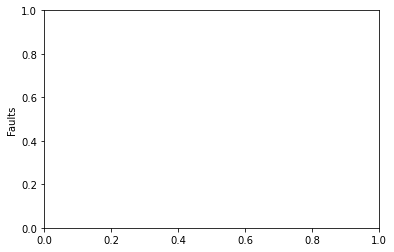

In [64]:
#Main Window
root1 = Tk()
root1.config(bg='black')
root1.attributes('-fullscreen', True)
#root1.state('zoomed')
#root1.geometry('758x800')

background_Image=PhotoImage(file = 'OS_2.png',master=root1)
background_Label = Label(root1,image=background_Image,bg='black').place(x=0,y=0)

#Title
Title_Image = PhotoImage(file = 'os_bg_title1.png',master= root1)
#Title_Image = PhotoImage(file = 'PNG 1.png',master= root1)
Title_Label= Label(root1,image=Title_Image,bg='cyan').place(x=200,y=30)


Temp_Label = Label(root1,text="",bg='black').grid(row=1,column=0)
#Input
#Enter the number of frames
Frame_Image = PhotoImage(file="os_bg_fr1.png",master= root1)
Frame_Label= Label(root1,image=Frame_Image,bg='cyan').place(x=150,y=270)
Frame_Entry=Entry(root1,borderwidth=5,width="30",font=20,relief=SUNKEN)
Frame_Entry.place(x=50,y=230)


#Reference String
#Enter string seperated by a space
String_Image = PhotoImage(file="os_bg_ref1.png",master= root1)
String_Label= Label(root1,image=String_Image,bg='cyan').place(x=900,y=270)
String_Entry=Entry(root1,borderwidth=5,width="30",font=30,relief=SUNKEN)
String_Entry.place(x=800,y=230)


#Select an Algo
Select_Image= PhotoImage(file='Select an algorithm.png',master=root1)
Select_Button = Button(root1,image=Select_Image,borderwidth=0,bg='#021d28',activebackground='#021d28',command=lambda: Sel_Algo(Frame_Entry.get(),String_Entry.get()))
Select_Button.place(x=500,y=460)

root1.mainloop()

